## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Low Confidence Test

In [2]:
yuzkiv = pd.read_csv('human_performance_data/yuzkiv_test_low_confidence.csv')
gatland = pd.read_csv('human_performance_data/gatland_test_low_confidence.csv')
digianvito = pd.read_csv('human_performance_data/digianvito_test_low_confidence.csv')

In [3]:
yuzkiv['image'] = yuzkiv['image'].str.extract(r'(frame.*)')
gatland['image'] = gatland['image'].str.extract(r'(frame.*)')
digianvito['image'] = digianvito['image'].str.extract(r'(frame.*)')

In [4]:
def add_war_label(data):
    # Define conditions and corresponding values
    conditions = [
        data['choice'].isin(['military', 'damaged_infrastructure', 'military&anchor',
                                    'damaged_infrastructure&anchor']),
        data['choice'].isin(['not_war']),
        data['choice'].isin(['low_confidence_war'])
    ]
    values = ['war', 'not_war', 'low_confidence_war']

    # Apply conditions and assign values to 'info' column
    data['label'] = np.select(conditions, values, default='')
    return data

yuzkiv = add_war_label(yuzkiv)
gatland = add_war_label(gatland)
digianvito = add_war_label(digianvito)

In [5]:
yuzkiv = yuzkiv[['image', 'label', 'choice']]
gatland = gatland[['image', 'label', 'choice']]
digianvito = digianvito[['image', 'label', 'choice']]

In [6]:
yuzkiv['image'] = yuzkiv['image'].str.extract(r'(frame.*)')
gatland['image'] = gatland['image'].str.extract(r'(frame.*)')
digianvito['image'] = digianvito['image'].str.extract(r'(frame.*)')

In [7]:
yuzkiv.shape, gatland.shape, digianvito.shape

((200, 3), (200, 3), (200, 3))

In [8]:
# First merge yuzkiv and gatland on 'image'
merged_df = pd.merge(yuzkiv, gatland, on='image', suffixes=('_yuzkiv', '_gatland'))

# Then merge the result with digianvito on 'image'
final_df = pd.merge(merged_df, digianvito, on='image', suffixes=('', '_digianvito'))

final_df.head()

,image,label_yuzkiv,choice_yuzkiv,label_gatland,choice_gatland,label,choice
0,frame_telecinco_noche_2023-08-20_sec_804.jpg,war,damaged_infrastructure,war,damaged_infrastructure,war,damaged_infrastructure
1,frame_telecinco_noche_2023-08-16_sec_937.jpg,war,military&anchor,war,military&anchor,war,military&anchor
2,frame_telecinco_noche_2023-08-16_sec_897.jpg,war,military,war,military,war,military
3,frame_telecinco_noche_2023-08-16_sec_877.jpg,war,military,war,military,war,military
4,frame_telecinco_noche_2023-08-16_sec_857.jpg,not_war,not_war,not_war,not_war,not_war,not_war


In [9]:
final_df['labels_match'] = np.where(
    (final_df['label_yuzkiv'] == final_df['label_gatland']) & 
    (final_df['label_yuzkiv'] == final_df['label']),
    True, 
    False
)

In [10]:
three_matched = final_df[final_df.labels_match == True].shape[0]
print(f'Number of matching labels for 3 people: {three_matched}')
print(f'Share of matching labels for 3 people: {three_matched/200}')

Number of matching labels for 3 people: 184
Share of matching labels for 3 people: 0.92


In [11]:
final_df['vika_and_ollie'] = np.where((final_df['label_yuzkiv'] == final_df['label_gatland']),
    True, 
    False
)

vika_ollie = final_df[final_df['vika_and_ollie'] == True].shape[0]

print(f'Number of matching labels for Vika and Ollie: {vika_ollie}')
print(f'Share of matching labels for Vika and Angelo: {vika_ollie/200}')

Number of matching labels for Vika and Ollie: 190
Share of matching labels for Vika and Angelo: 0.95


In [12]:
final_df['vika_and_angelo'] = np.where((final_df['label_yuzkiv'] == final_df['label']),
    True, 
    False
)

vika_angelo = final_df[final_df['vika_and_angelo'] == True].shape[0]

print(f'Number of matching labels for Vika and Angelo: {vika_angelo}')
print(f'Share of matching labels for Vika and Angelo: {vika_angelo/200}')

Number of matching labels for Vika and Angelo: 188
Share of matching labels for Vika and Angelo: 0.94


In [13]:
final_df['ollie_and_angelo'] = np.where((final_df['label_gatland'] == final_df['label']),
    True, 
    False
)

ollie_angelo = final_df[final_df['ollie_and_angelo'] == True].shape[0]

print(f'Number of matching labels for Ollie and Angelo: {ollie_angelo}')
print(f'Share of matching labels for Ollie and Angelo: {ollie_angelo/200}')

Number of matching labels for Ollie and Angelo: 190
Share of matching labels for Ollie and Angelo: 0.95


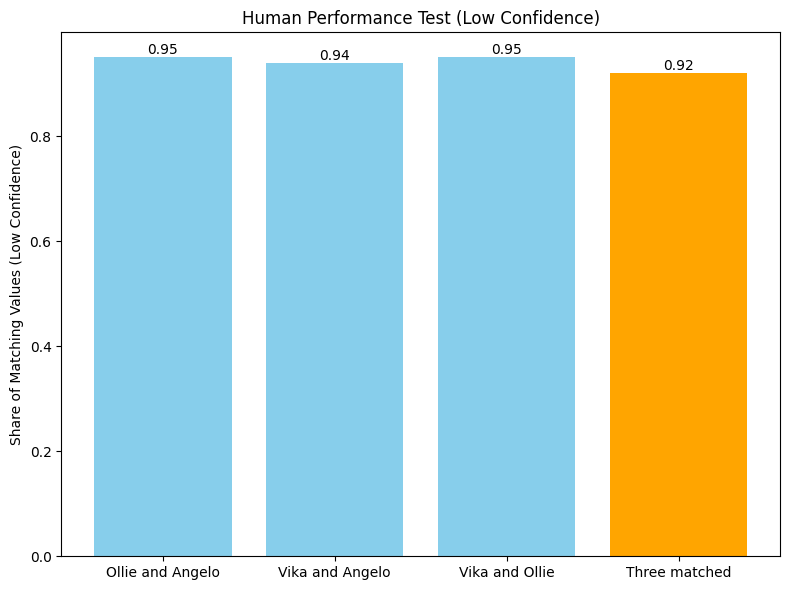

In [14]:
variables = ['Ollie and Angelo', 'Vika and Angelo', 'Vika and Ollie', 'Three matched']
values = [ollie_angelo/200, vika_angelo/200, vika_ollie/200, three_matched/200]

# Assign colors
colors = ['skyblue', 'skyblue', 'skyblue', 'orange']
# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(variables, values, color=colors)

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Share of Matching Values')
plt.title('Human Performance Test (Low Confidence)')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Hide axes titles (both x-axis and y-axis titles)
plt.xlabel('')
plt.ylabel('Share of Matching Values')    
    
plt.tight_layout()
plt.show()

### Get final labels for the dataset

In [15]:
# def most_common_or_null(row):
#     # Get the choices as a list
#     choices = [row['choice_yuzkiv'], row['choice_gatland'], row['choice']]
#     # Count the occurrences of each choice
#     counts = pd.Series(choices).value_counts()
#     # Check the most common value
#     if counts.iloc[0] >= 2:
#         # If the most common value appears at least twice, return it
#         return counts.index[0]
#     else:
#         # Otherwise, return None
#         return None

# # Apply the function to each row to create the choice_final column
# final_df['choice_final'] = final_df.apply(most_common_or_null, axis=1)
# final_df.head()

In [64]:
# final_df = final_df[~final_df.choice_final.isnull()]

In [65]:
# final_df = final_df[['image', 'choice_final']]
# final_df.head()

,image,choice_final
0,frame_telecinco_noche_2023-08-20_sec_804.jpg,damaged_infrastructure
1,frame_telecinco_noche_2023-08-16_sec_937.jpg,military&anchor
2,frame_telecinco_noche_2023-08-16_sec_897.jpg,military
3,frame_telecinco_noche_2023-08-16_sec_877.jpg,military
4,frame_telecinco_noche_2023-08-16_sec_857.jpg,not_war


In [66]:
# final_df.to_csv('/Users/viktoriia/Desktop/new_labels/low_confidence_res/lc_human_performance_labels.csv',index=False)

## Human Level Performance on a Subset of Data

In [20]:
yuzkiv_test2 = pd.read_csv('human_performance_data/yuzkiv_test2.csv')
gatland_test2 = pd.read_csv('human_performance_data/gatland_test2.csv')
digianvito_test2 = pd.read_csv('human_performance_data/digianvito_test2.csv')

In [21]:
yuzkiv_test2 = add_war_label(yuzkiv_test2)
gatland_test2 = add_war_label(gatland_test2)
digianvito_test2 = add_war_label(digianvito_test2)

In [22]:
yuzkiv_test2 = yuzkiv_test2[['image', 'label', 'choice']]
gatland_test2 = gatland_test2[['image', 'label', 'choice']]
digianvito_test2 = digianvito_test2[['image', 'label', 'choice']]

In [23]:
yuzkiv_test2['image'] = yuzkiv_test2['image'].str.extract(r'(frame.*)')
gatland_test2['image'] = gatland_test2['image'].str.extract(r'(frame.*)')
digianvito_test2['image'] = digianvito_test2['image'].str.extract(r'(frame.*)')

In [24]:
yuzkiv_test2.shape, gatland_test2.shape, digianvito_test2.shape

((208, 3), (208, 3), (200, 3))

In [25]:
# First merge yuzkiv and gatland on 'image'
merged_df_test2 = pd.merge(yuzkiv_test2, gatland_test2, on='image', suffixes=('_yuzkiv', '_gatland'))

# Then merge the result with digianvito on 'image'
final_df_test2 = pd.merge(merged_df_test2, digianvito_test2, on='image', suffixes=('', '_digianvito'))

final_df_test2.head()

,image,label_yuzkiv,choice_yuzkiv,label_gatland,choice_gatland,label,choice
0,frame_la6_noche_2024-04-23_sec_1734.jpg,not_war,not_war,not_war,not_war,not_war,not_war
1,frame_la6_noche_2024-04-23_sec_1714.jpg,not_war,not_war,not_war,not_war,not_war,not_war
2,frame_la6_noche_2024-04-23_sec_1694.jpg,not_war,not_war,not_war,not_war,not_war,not_war
3,frame_la6_noche_2024-04-23_sec_1674.jpg,not_war,not_war,not_war,not_war,not_war,not_war
4,frame_la6_noche_2024-04-23_sec_1654.jpg,not_war,not_war,not_war,not_war,not_war,not_war


In [26]:
final_df_test2.shape

(200, 7)

In [27]:
final_df_test2['labels_match'] = np.where(
    (final_df_test2['label_yuzkiv'] == final_df_test2['label_gatland']) & 
    (final_df_test2['label_yuzkiv'] == final_df_test2['label']),
    True, 
    False
)

In [28]:
three_matched_test2 = final_df_test2[final_df_test2.labels_match == True].shape[0]
print(f'Number of matching labels for 3 people: {three_matched_test2}')
print(f'Share of matching labels for 3 people: {three_matched_test2/200}')

Number of matching labels for 3 people: 188
Share of matching labels for 3 people: 0.94


In [29]:
final_df_test2['vika_and_ollie'] = np.where((final_df_test2['label_yuzkiv'] == final_df_test2['label_gatland']),
    True, 
    False
)

vika_ollie_test2 = final_df_test2[final_df_test2['vika_and_ollie'] == True].shape[0]

print(f'Number of matching labels for Vika and Ollie: {vika_ollie_test2}')
print(f'Share of matching labels for Vika and Angelo: {vika_ollie_test2/200}')

Number of matching labels for Vika and Ollie: 192
Share of matching labels for Vika and Angelo: 0.96


In [30]:
final_df_test2['vika_and_angelo'] = np.where((final_df_test2['label_yuzkiv'] == final_df_test2['label']),
    True, 
    False
)

vika_angelo_test2 = final_df_test2[final_df_test2['vika_and_angelo'] == True].shape[0]

print(f'Number of matching labels for Vika and Angelo: {vika_angelo_test2}')
print(f'Share of matching labels for Vika and Angelo: {vika_angelo_test2/200}')

Number of matching labels for Vika and Angelo: 193
Share of matching labels for Vika and Angelo: 0.965


In [31]:
final_df_test2['ollie_and_angelo'] = np.where((final_df_test2['label_gatland'] == final_df_test2['label']),
    True, 
    False
)

ollie_angelo_test2 = final_df_test2[final_df_test2['ollie_and_angelo'] == True].shape[0]

print(f'Number of matching labels for Ollie and Angelo: {ollie_angelo_test2}')
print(f'Share of matching labels for Ollie and Angelo: {ollie_angelo_test2/200}')

Number of matching labels for Ollie and Angelo: 191
Share of matching labels for Ollie and Angelo: 0.955


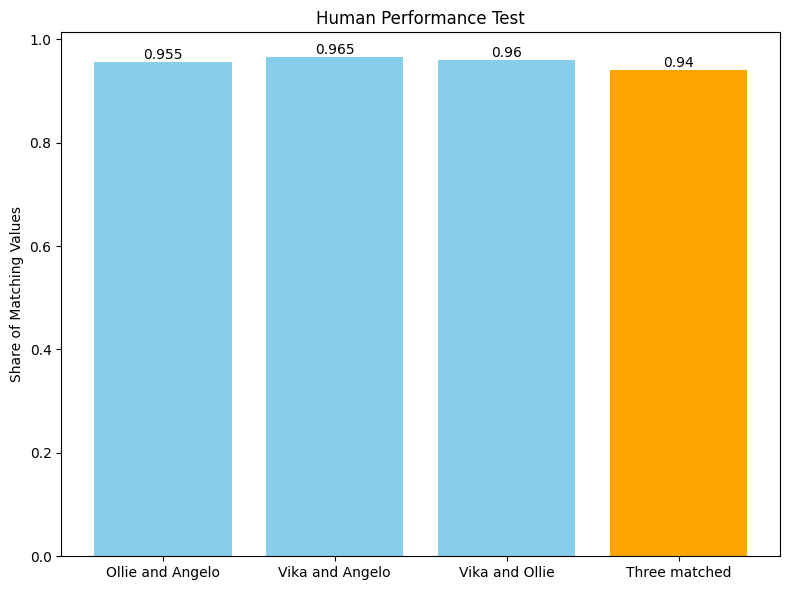

In [33]:
# Example data (replace with your actual data)
variables_test2 = ['Ollie and Angelo', 'Vika and Angelo', 'Vika and Ollie', 'Three matched']
values_test2 = [ollie_angelo_test2/200, vika_angelo_test2/200, vika_ollie_test2/200, three_matched_test2/200]

# Assign colors
colors = ['skyblue', 'skyblue', 'skyblue', 'orange']  # 'three_matched' in orange, others in skyblue

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(variables_test2, values_test2, color=colors)

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Share of Matching Values')
plt.title('Human Performance Test')

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

# Hide axes titles (both x-axis and y-axis titles)
plt.xlabel('')
plt.ylabel('Share of Matching Values')    
    
plt.tight_layout()
plt.show()

### Get final labels for the dataset

In [ ]:
# final_df = final_df[['image', 'choice_yuzkiv', 'choice_gatland', 'choice']]

In [ ]:
# Apply the function to each row to create the choice_final column
# final_df['choice_final'] = final_df.apply(most_common_or_null, axis=1)
# final_df.head()

In [ ]:
# final_df = final_df[~final_df.choice_final.isnull()]

In [ ]:
# final_df = final_df[['image', 'choice_final']]
# final_df.head()

In [ ]:
# final_df.to_csv('/Users/viktoriia/Desktop/new_labels/human_performance/human_performance_labels.csv',index=False)